# 🌸 Iris Dataset Clustering

In [42]:
!pip install numpy pandas matplotlib seaborn scikit-learn optuna ipykernel ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.3 MB/s eta 0:00:00


In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn.metrics import (
  silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix)

# Optimization
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_slice

# Settings
import warnings
warnings.filterwarnings('ignore')

# Visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Reproducibility
np.random.seed(42)


In [3]:
# Load dataset
iris = load_iris()
X = iris.data         # Features (attributes)
y = iris.target       # Labels (only for evaluation, not used in clustering)
feature_names = iris.feature_names
target_names = iris.target_names

# Basic information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(f"Data shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"\nFeature names:\n  {', '.join(feature_names)}")
print(f"\nClass names:\n  {', '.join(target_names)}")


DATASET INFORMATION
Data shape: (150, 4)
Number of samples: 150
Number of features: 4
Number of classes: 3

Feature names:
  sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

Class names:
  setosa, versicolor, virginica


In [6]:
# Create DataFrame for easier analysis
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

# Display first rows
print("First rows of the dataset:")
display(df.head(10))


First rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
# Descriptive statistics
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Class distribution
print("Species Distribution:")
print(df['species'].value_counts().sort_index())
print("\n✓ Balanced dataset: 50 samples per class")

Species Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

✓ Balanced dataset: 50 samples per class


In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n✓ No missing values detected")

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

✓ No missing values detected


Correlation Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


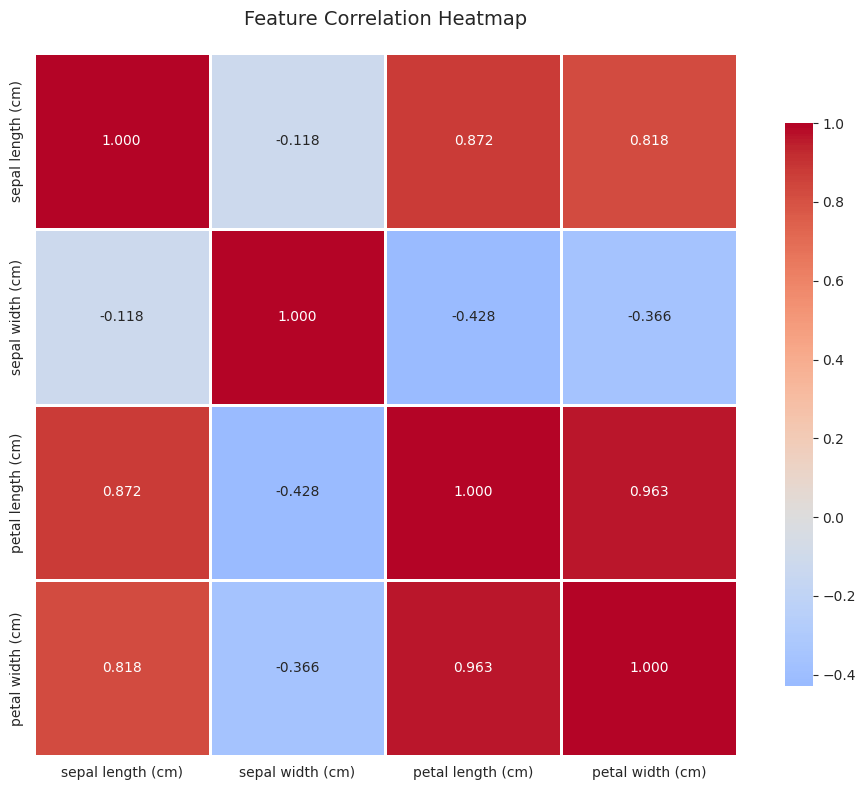


Observations:
  • Petal length and petal width are highly correlated (0.963)
  • Sepal width has negative correlation with other features


In [12]:
# Calculate correlations
correlation_matrix = df.iloc[:, :-1].corr()

print("Correlation Matrix:")
display(correlation_matrix)
print()

# Visualize heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nObservations:")
print("  • Petal length and petal width are highly correlated (0.963)")
print("  • Sepal width has negative correlation with other features")


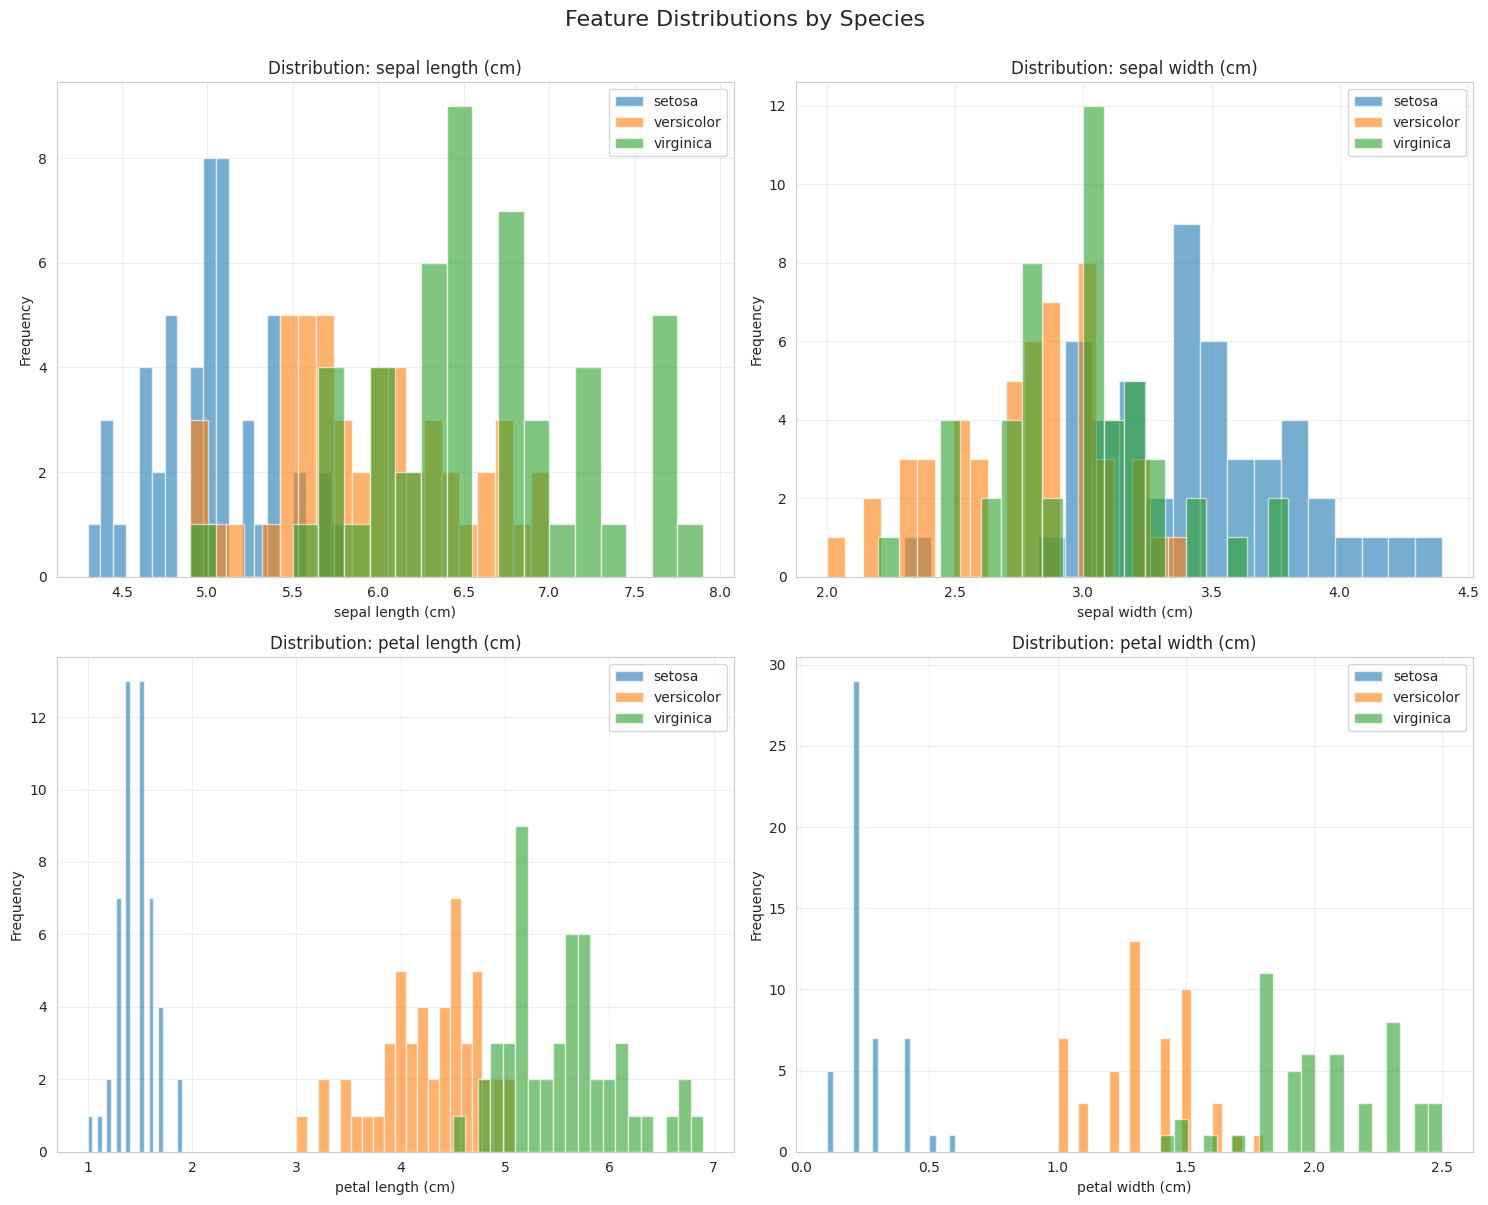

In [13]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Distributions by Species', fontsize=16, y=1.00)

for idx, feature in enumerate(feature_names):
  ax = axes[idx // 2, idx % 2]
  for species in target_names:
    data = df[df['species'] == species][feature]
    ax.hist(data, alpha=0.6, label=species, bins=20)

  ax.set_xlabel(feature)
  ax.set_ylabel('Frequency')
  ax.set_title(f'Distribution: {feature}')
  ax.legend()
  ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


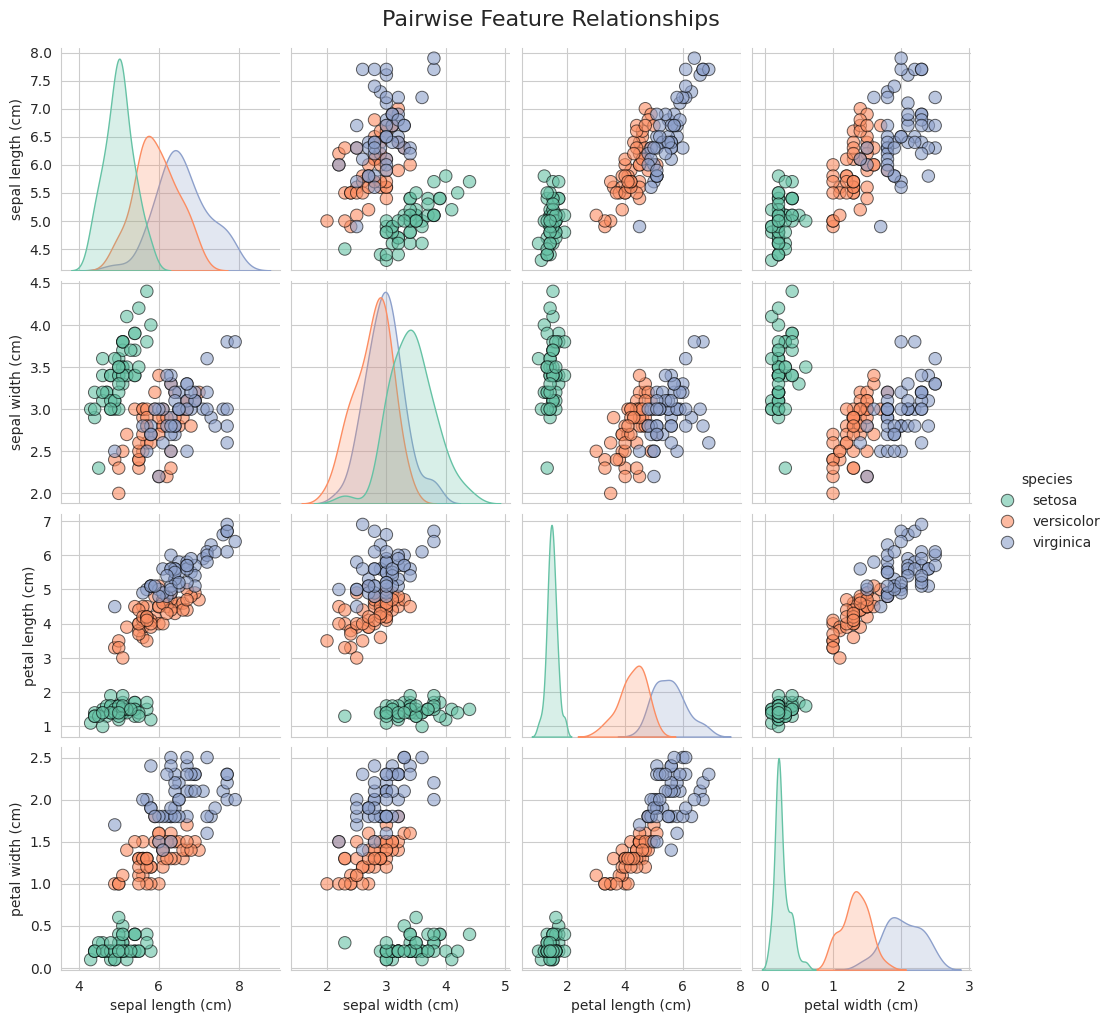


Observations:
  • Setosa is clearly separable from other species
  • Versicolor and Virginica have some overlap
  • Petal measurements are more discriminative than sepal measurements


In [14]:
# Pairplot
pairplot = sns.pairplot(df, hue='species', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2.5)
pairplot.fig.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=16)
plt.show()

print("\nObservations:")
print("  • Setosa is clearly separable from other species")
print("  • Versicolor and Virginica have some overlap")
print("  • Petal measurements are more discriminative than sepal measurements")


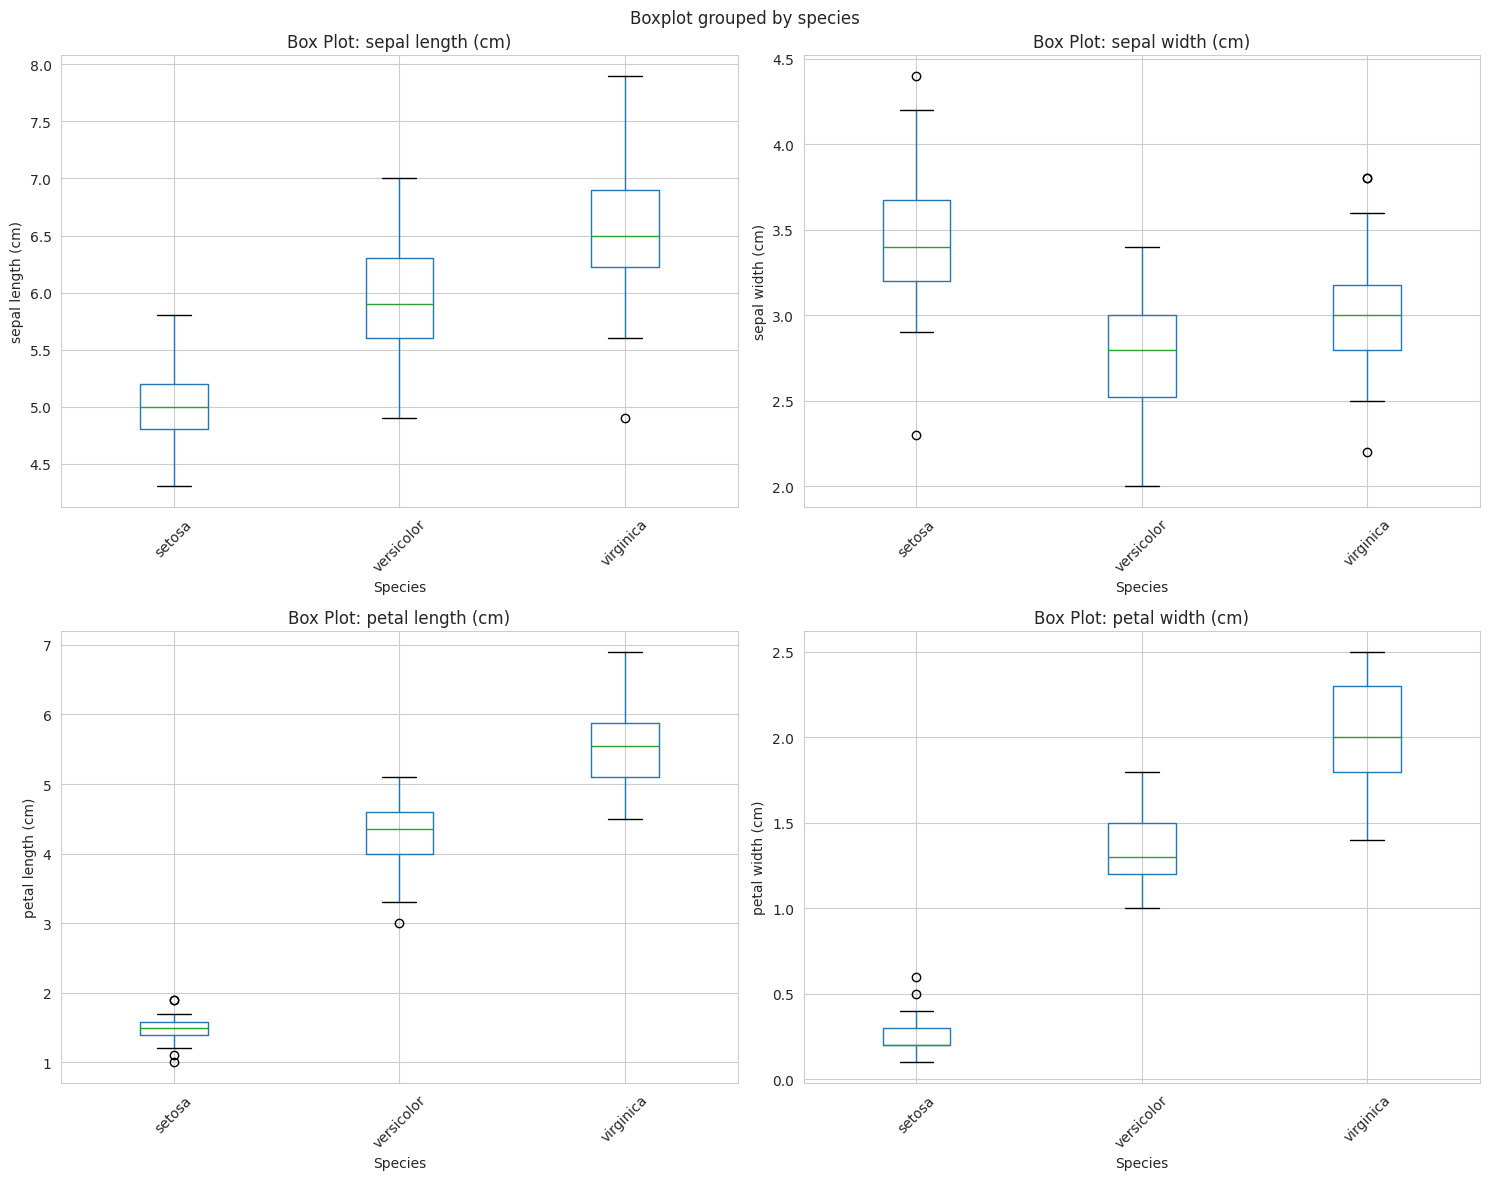

In [15]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Box Plots by Species', fontsize=16, y=1.00)

for idx, feature in enumerate(feature_names):
  ax = axes[idx // 2, idx % 2]
  df.boxplot(column=feature, by='species', ax=ax)
  ax.set_xlabel('Species')
  ax.set_ylabel(feature)
  ax.set_title(f'Box Plot: {feature}')
  plt.sca(ax)
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("=" * 80)
print("PREPROCESSING")
print("=" * 80)
print(f"Original data - Min: {X.min():.2f}, Max: {X.max():.2f}")
print(f"Scaled data - Min: {X_scaled.min():.2f}, Max: {X_scaled.max():.2f}")
print(f"\nMean after scaling: {X_scaled.mean(axis=0)}")
print(f"Std after scaling: {X_scaled.std(axis=0)}")
print("\nStandardization completed (mean=0, std=1)")

PREPROCESSING
Original data - Min: 0.10, Max: 7.90
Scaled data - Min: -2.43, Max: 3.09

Mean after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std after scaling: [1. 1. 1. 1.]

Standardization completed (mean=0, std=1)


In [17]:
def objective(trial):
  """
  Objective function for Optuna optimization. Optimized hyperparameters:
    - n_clusters: number of clusters (2-10)
    - init: initialization method ('k-means++' or 'random')
    - max_iter: maximum iterations (100-1000)
    - n_init: number of initializations (5-20)

  Metric: Silhouette Score (maximization)
  """
  # Suggest hyperparameters
  n_clusters = trial.suggest_int('n_clusters', 2, 10)
  init = trial.suggest_categorical('init', ['k-means++', 'random'])
  max_iter = trial.suggest_int('max_iter', 100, 1000, step=100)
  n_init = trial.suggest_int('n_init', 5, 20)

  # Train model
  kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, n_init=n_init, random_state=42)

  clusters = kmeans.fit_predict(X_scaled)

  # Calculate Silhouette Score
  score = silhouette_score(X_scaled, clusters)

  return score

print("Objective function defined")

Objective function defined


In [18]:
# Create Optuna study
study = optuna.create_study(direction='maximize', study_name='iris_kmeans_optimization')

# Optimize (100 trials)
print("Starting Optuna optimization...\n")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Results
print("\n" + "=" * 80)
print("OPTIMIZATION RESULTS")
print("=" * 80)
print(f"Number of trials: {len(study.trials)}")
print(f"Best trial: #{study.best_trial.number}")
print(f"Best Silhouette Score: {study.best_value:.4f}")
print("\nBest Hyperparameters:")
for key, value in study.best_params.items():
  print(f"• {key}: {value}")


[I 2026-02-17 00:56:11,535] A new study created in memory with name: iris_kmeans_optimization


Starting Optuna optimization...



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-02-17 00:56:11,617] Trial 0 finished with value: 0.4630420362927048 and parameters: {'n_clusters': 3, 'init': 'random', 'max_iter': 300, 'n_init': 5}. Best is trial 0 with value: 0.4630420362927048.
[I 2026-02-17 00:56:11,639] Trial 1 finished with value: 0.3339432304006177 and parameters: {'n_clusters': 6, 'init': 'k-means++', 'max_iter': 900, 'n_init': 8}. Best is trial 0 with value: 0.4630420362927048.
[I 2026-02-17 00:56:11,670] Trial 2 finished with value: 0.3459012795948778 and parameters: {'n_clusters': 5, 'init': 'random', 'max_iter': 500, 'n_init': 18}. Best is trial 0 with value: 0.4630420362927048.
[I 2026-02-17 00:56:11,688] Trial 3 finished with value: 0.3265618959264091 and parameters: {'n_clusters': 6, 'init': 'random', 'max_iter': 600, 'n_init': 17}. Best is trial 0 with value: 0.4630420362927048.
[I 2026-02-17 00:56:11,719] Trial 4 finished with value: 0.3201967939183684 and parameters: {'n_clusters': 7, 'init': 'k-means++', 'max_iter': 500, 'n_init': 11}. Best

In [21]:
# Optimization history
fig = plot_optimization_history(study)
fig.update_layout(title="Optimization History - Silhouette Score")
fig.show()

print("\nEvolution of Silhouette Score across trials")


Evolution of Silhouette Score across trials


In [22]:
# Parameter importances
fig = plot_param_importances(study)
fig.update_layout(title="Hyperparameter Importance")
fig.show()

print("\nImpact of each hyperparameter on the result")


Impact of each hyperparameter on the result


In [23]:
# Slice plot
fig = plot_slice(study)
fig.update_layout(title="Parameter Slice Analysis")
fig.show()

print("\nRelationship between each parameter and Silhouette Score")


Relationship between each parameter and Silhouette Score


In [24]:
# Train model with best parameters
best_params = study.best_params

best_kmeans = KMeans(
  n_clusters=best_params['n_clusters'], init=best_params['init'],
  max_iter=best_params['max_iter'], n_init=best_params['n_init'], random_state=42)

# Fit and predict
best_kmeans.fit(X_scaled)
predictions = best_kmeans.predict(X_scaled)

print("=" * 80)
print("MODEL TRAINED")
print("=" * 80)
print(f"Number of clusters: {best_kmeans.n_clusters}")
print(f"Iterations performed: {best_kmeans.n_iter_}")
print(f"Inertia (sum of squared distances): {best_kmeans.inertia_:.4f}")
print("\nModel trained successfully!")


MODEL TRAINED
Number of clusters: 2
Iterations performed: 4
Inertia (sum of squared distances): 222.3617

Model trained successfully!


Sample Distribution by Cluster:
  - Cluster 0: 50 samples (33.3%)
  - Cluster 1: 100 samples (66.7%)



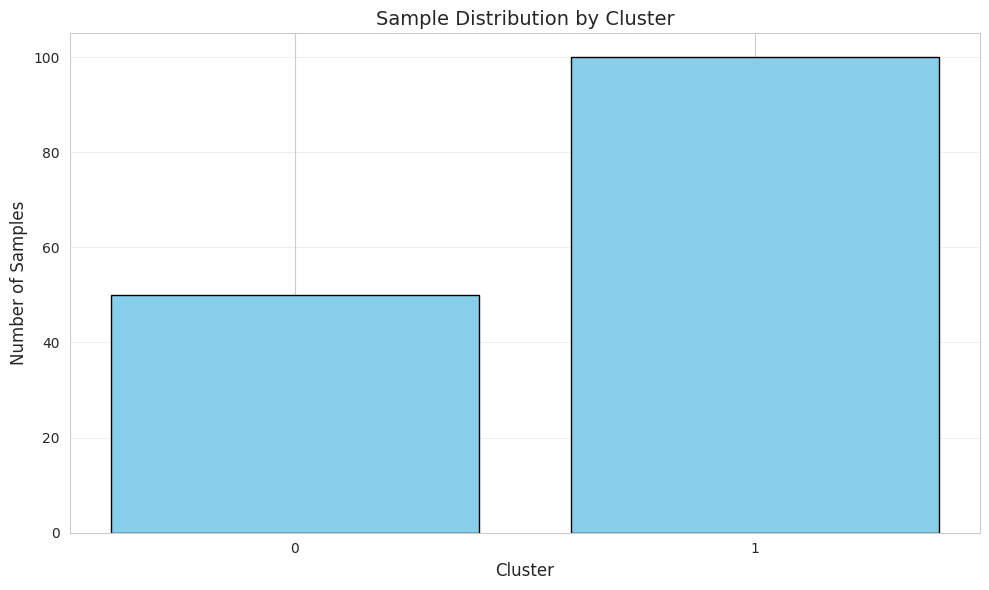

In [26]:
# Cluster distribution
unique, counts = np.unique(predictions, return_counts=True)

print("Sample Distribution by Cluster:")
for cluster, count in zip(unique, counts):
  percentage = count / len(predictions) * 100
  print(f"  - Cluster {cluster}: {count} samples ({percentage:.1f}%)")

print()

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Sample Distribution by Cluster', fontsize=14)
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [28]:
# Calculate internal metrics
silhouette = silhouette_score(X_scaled, predictions)
davies_bouldin = davies_bouldin_score(X_scaled, predictions)
calinski_harabasz = calinski_harabasz_score(X_scaled, predictions)

print("=" * 80)
print("INTERNAL METRICS (UNSUPERVISED)")
print("=" * 80)

print(f"\nSilhouette Score: {silhouette:.4f}")
print("  → Range: [-1, 1], higher is better")
print("  → Measures cluster cohesion and separation")
print("  → > 0.5 indicates reasonable clustering")

print(f"\nDavies-Bouldin Index: {davies_bouldin:.4f}")
print("  → Range: [0, ∞), lower is better")
print("  → Measures cluster separation")
print("  → Low values indicate well-defined clusters")

print(f"\nCalinski-Harabasz Score: {calinski_harabasz:.4f}")
print("  → Range: [0, ∞), higher is better")
print("  → Measures cluster density and separation")
print("  → High values indicate well-defined clusters")

INTERNAL METRICS (UNSUPERVISED)

Silhouette Score: 0.5818
  → Range: [-1, 1], higher is better
  → Measures cluster cohesion and separation
  → > 0.5 indicates reasonable clustering

Davies-Bouldin Index: 0.5933
  → Range: [0, ∞), lower is better
  → Measures cluster separation
  → Low values indicate well-defined clusters

Calinski-Harabasz Score: 251.3493
  → Range: [0, ∞), higher is better
  → Measures cluster density and separation
  → High values indicate well-defined clusters


In [31]:
# Calculate external metrics
ari = adjusted_rand_score(y, predictions)
nmi = normalized_mutual_info_score(y, predictions)

print("=" * 80)
print("EXTERNAL METRICS (COMPARISON WITH TRUE LABELS)")
print("=" * 80)
print("  Used only for evaluation, not during clustering\n")

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print("  → Range: [-1, 1], higher is better")
print("  → Measures similarity to true classification")
print("  → ARI = 1 indicates perfect clustering")

print(f"\nNormalized Mutual Information (NMI): {nmi:.4f}")
print("  → Range: [0, 1], higher is better")
print("  → Measures information shared with true labels")
print("  → NMI = 1 indicates perfect agreement")

EXTERNAL METRICS (COMPARISON WITH TRUE LABELS)
  Used only for evaluation, not during clustering

Adjusted Rand Index (ARI): 0.5681
  → Range: [-1, 1], higher is better
  → Measures similarity to true classification
  → ARI = 1 indicates perfect clustering

Normalized Mutual Information (NMI): 0.7337
  → Range: [0, 1], higher is better
  → Measures information shared with true labels
  → NMI = 1 indicates perfect agreement


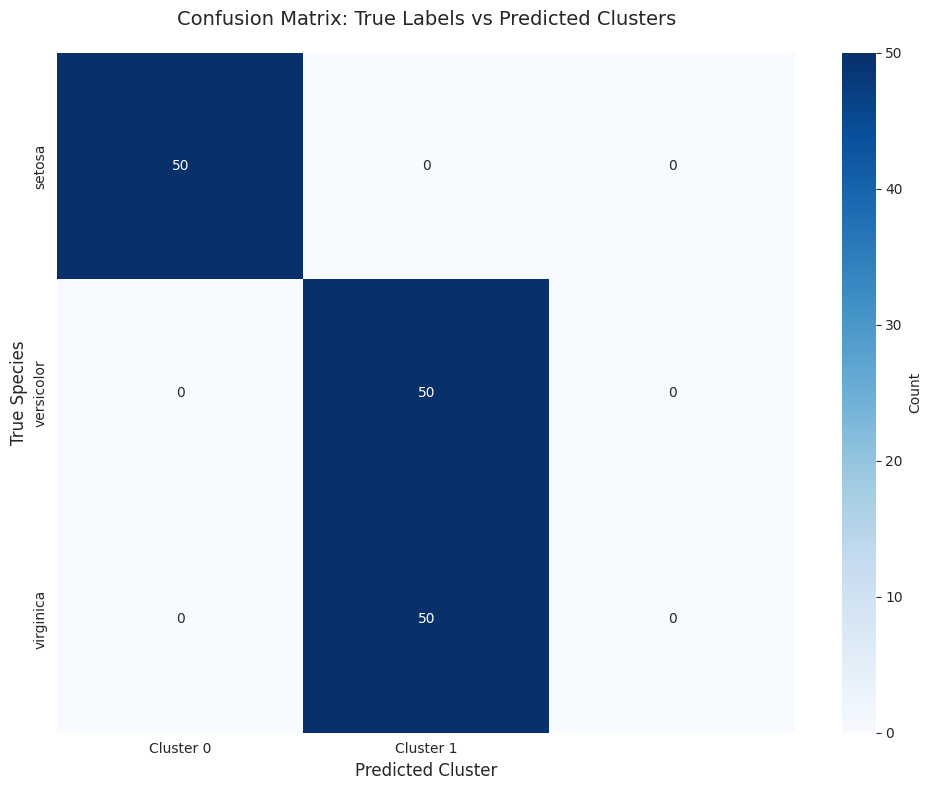


Comparison between predicted clusters and true species


In [33]:
# Confusion matrix
cm = confusion_matrix(y, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(
  cm, annot=True, fmt='d', cmap='Blues',
  xticklabels=[f'Cluster {i}' for i in range(best_kmeans.n_clusters)],
  yticklabels=target_names, cbar_kws={'label': 'Count'})

plt.xlabel('Predicted Cluster', fontsize=12)
plt.ylabel('True Species', fontsize=12)
plt.title('Confusion Matrix: True Labels vs Predicted Clusters', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nComparison between predicted clusters and true species")

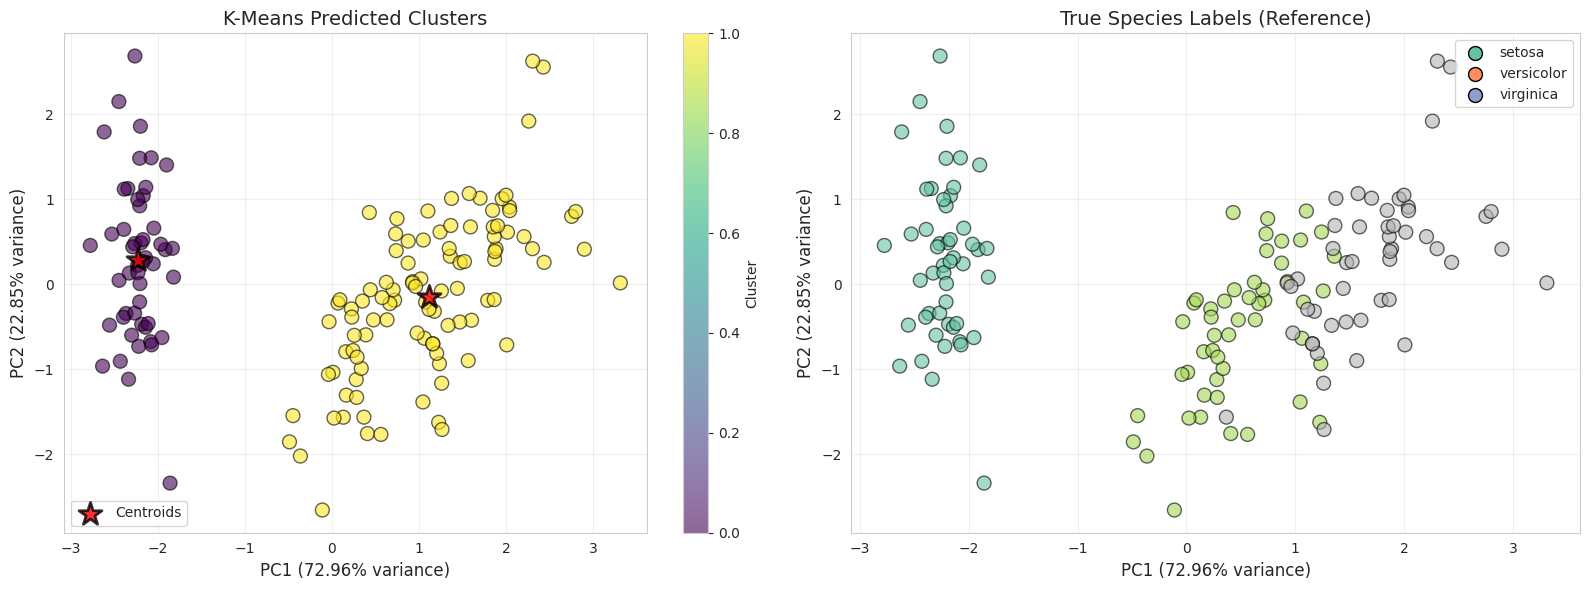


Variance explained by PCA: 95.81%


In [34]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Transform centroids to PCA space
centers_pca = pca.transform(best_kmeans.cluster_centers_)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Predicted clusters
scatter1 = axes[0].scatter(
  X_pca[:, 0], X_pca[:, 1], c=predictions, cmap='viridis', s=100, alpha=0.6, edgecolors='k')

# Plot centroids
axes[0].scatter(
  centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, alpha=0.8,
  edgecolors='black', linewidths=2, marker='*', label='Centroids')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
axes[0].set_title('K-Means Predicted Clusters', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: True labels
scatter2 = axes[1].scatter(
  X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set2', s=100, alpha=0.6, edgecolors='k')

axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
axes[1].set_title('True Species Labels (Reference)', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Custom legend for true labels
for i, species in enumerate(target_names):
  axes[1].scatter([], [], c=[plt.cm.Set2(i)], s=100, label=species, edgecolors='k')

axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nVariance explained by PCA: {pca.explained_variance_ratio_.sum():.2%}")

Feature Statistics by Cluster:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.006,3.428,1.462,0.246
1,6.262,2.872,4.906,1.676


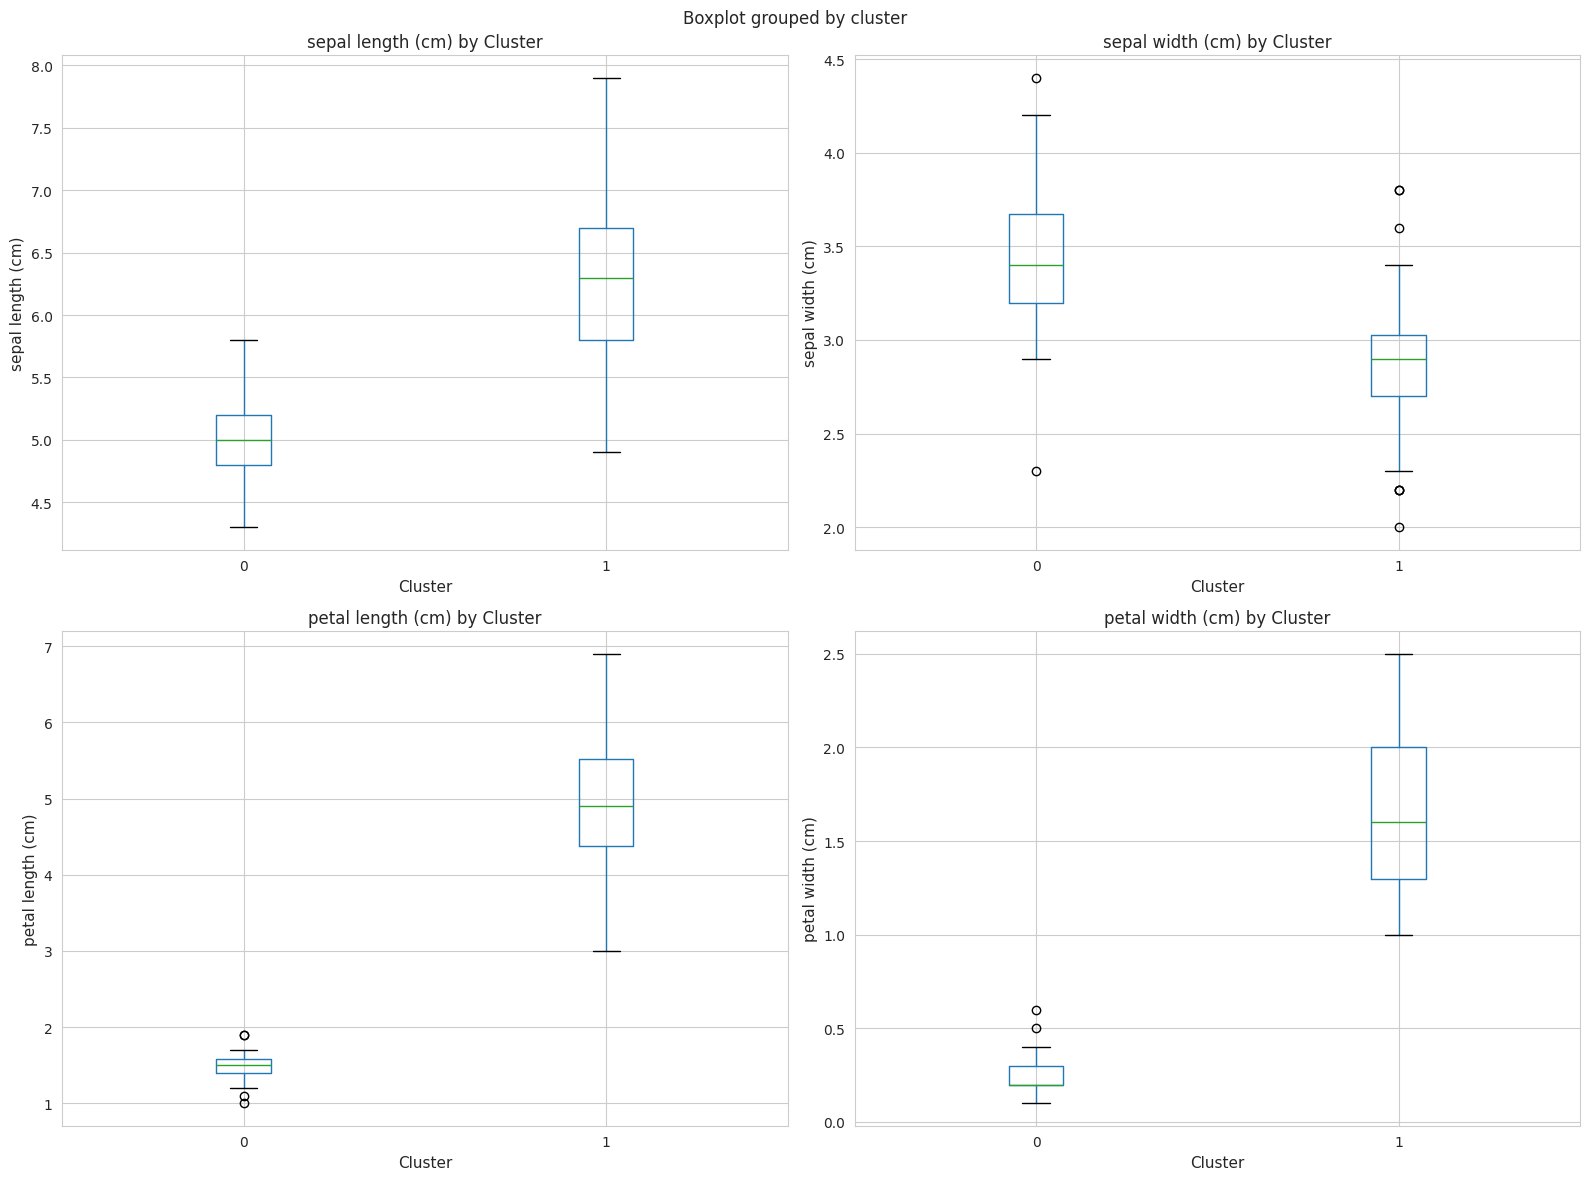

In [37]:
# Add predictions to DataFrame
df_analysis = df.copy()
df_analysis['cluster'] = predictions

# Statistics by cluster
print("Feature Statistics by Cluster:\n")
cluster_stats = df_analysis.groupby('cluster')[feature_names].mean()
display(cluster_stats)

print()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Characteristics by Cluster', fontsize=16, y=1.00)

for idx, feature in enumerate(feature_names):
  ax = axes[idx // 2, idx % 2]
  df_analysis.boxplot(column=feature, by='cluster', ax=ax)
  ax.set_xlabel('Cluster', fontsize=11)
  ax.set_ylabel(feature, fontsize=11)
  ax.set_title(f'{feature} by Cluster', fontsize=12)
  plt.sca(ax)

plt.tight_layout()
plt.show()

Cluster Centroids (Scaled Features):



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster 0,-1.014579,0.853263,-1.304987,-1.254893
Cluster 1,0.507289,-0.426631,0.652494,0.627447


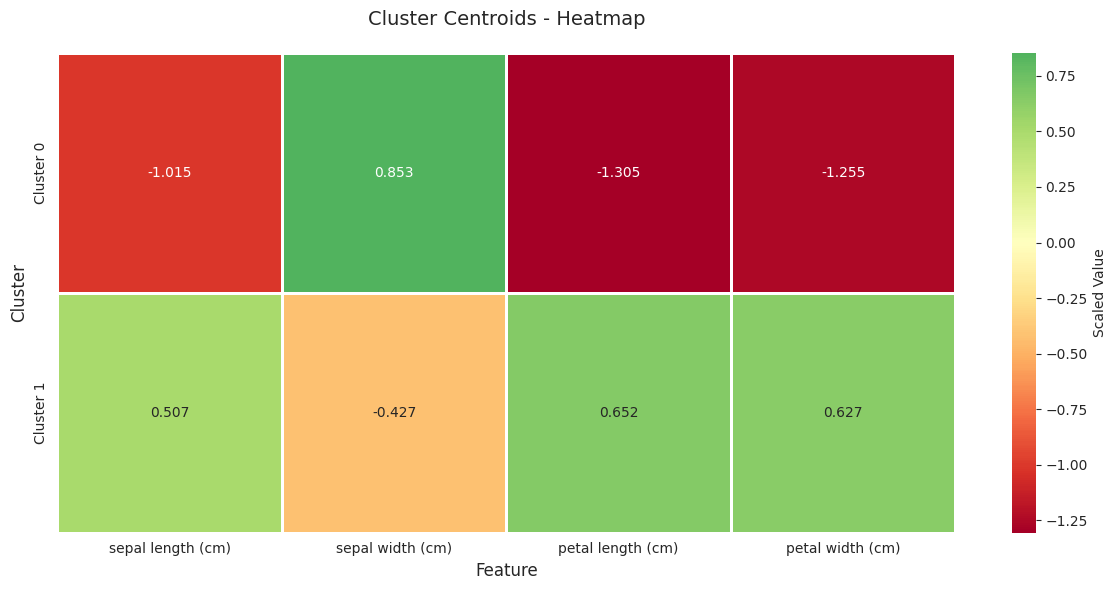

In [39]:
# Show centroids (scaled features)
centroids_df = pd.DataFrame(
  best_kmeans.cluster_centers_, columns=feature_names,
  index=[f'Cluster {i}' for i in range(best_kmeans.n_clusters)])

print("Cluster Centroids (Scaled Features):\n")
display(centroids_df)

print()

# Visualize centroids
plt.figure(figsize=(12, 6))
sns.heatmap(
  centroids_df, annot=True, fmt='.3f', cmap='RdYlGn',
  center=0, linewidths=1, cbar_kws={'label': 'Scaled Value'})
plt.title('Cluster Centroids - Heatmap', fontsize=14, pad=20)
plt.ylabel('Cluster', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [41]:
# Create summary
summary = f"""
  {'=' * 80}
  IRIS DATASET CLUSTERING ANALYSIS - SUMMARY
  {'=' * 80}

  DATASET
  • Samples: {X.shape[0]}
  • Features: {X.shape[1]}
  • True classes: {len(target_names)}

  MODEL
  • Algorithm: K-Means
  • Optimization: Optuna (Bayesian Optimization)
  • Trials executed: {len(study.trials)}

  OPTIMAL CONFIGURATION
  • Number of clusters: {best_params['n_clusters']}
  • Initialization method: {best_params['init']}
  • Max iterations: {best_params['max_iter']}
  • Number of initializations: {best_params['n_init']}
  • Iterations performed: {best_kmeans.n_iter_}
  • Inertia: {best_kmeans.inertia_:.4f}

  INTERNAL METRICS (Unsupervised)
  • Silhouette Score: {silhouette:.4f}
  • Davies-Bouldin Index: {davies_bouldin:.4f}
  • Calinski-Harabasz Score: {calinski_harabasz:.4f}

  EXTERNAL METRICS (Comparison with labels)
  • Adjusted Rand Index: {ari:.4f}
  • Normalized Mutual Info: {nmi:.4f}

  INTERPRETATION
"""

# Add interpretation based on metrics
if silhouette > 0.7:
  summary += "   Excellent clustering: Very well-defined cluster structure\n"
elif silhouette > 0.5:
  summary += "   Good clustering: Reasonably well-defined cluster structure\n"
elif silhouette > 0.25:
  summary += "   Fair clustering: Weak cluster structure\n"
else:
  summary += "   Poor clustering: Overlapping clusters\n"

if ari > 0.7:
  summary += "   Strong agreement with true species labels\n"
elif ari > 0.5:
  summary += "   Moderate agreement with true species labels\n"
else:
  summary += "   Weak agreement with true species labels\n"

summary += f"""
  {'=' * 80}
  CONCLUSION
  {'=' * 80}

  The K-Means algorithm identified {best_kmeans.n_clusters} main clusters in the
  Iris dataset with a Silhouette Score of {silhouette:.4f}. The Optuna optimization
  process explored {len(study.trials)} different configurations to find the optimal
  hyperparameters.

  The agreement with true species labels (ARI = {ari:.4f}) demonstrates that
  unsupervised learning successfully discovered natural patterns in the data,
  even without access to labels during training.

  {'=' * 80}
"""

print(summary)




  IRIS DATASET CLUSTERING ANALYSIS - SUMMARY

  DATASET
  • Samples: 150
  • Features: 4
  • True classes: 3

  MODEL
  • Algorithm: K-Means
  • Optimization: Optuna (Bayesian Optimization)
  • Trials executed: 100

  OPTIMAL CONFIGURATION
  • Number of clusters: 2
  • Initialization method: random
  • Max iterations: 100
  • Number of initializations: 5
  • Iterations performed: 4
  • Inertia: 222.3617

  INTERNAL METRICS (Unsupervised)
  • Silhouette Score: 0.5818
  • Davies-Bouldin Index: 0.5933
  • Calinski-Harabasz Score: 251.3493

  EXTERNAL METRICS (Comparison with labels)
  • Adjusted Rand Index: 0.5681
  • Normalized Mutual Info: 0.7337

  INTERPRETATION
   Good clustering: Reasonably well-defined cluster structure
   Moderate agreement with true species labels

  CONCLUSION

  The K-Means algorithm identified 2 main clusters in the
  Iris dataset with a Silhouette Score of 0.5818. The Optuna optimization
  process explored 100 different configurations to find the optimal
  h